In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns; sns.set()
import utils
import numpy as np
from subprocess import call

plt.rcParams['figure.figsize'] = (10, 6)

In [62]:
X = [i for i in range(1,31)] #+ [i for i in range(51,272, 20)] + [i for i in range(277,400, 35)]
alpha = [i for i in range(1, 50, 4)]
for a in alpha:
    for k in X:
        call(['../src/main', '-m', '1', '-q', 'nuestros/ImagenesCaras80.test', '-i', 'nuestros/ImagenesCaras80.train','-o', 'exp2/result_alpha{}_k{}'.format(a, k), '-knn-k', str(k), '-alpha', str(a)])

In [29]:
DIR_PATH = '../tests/exp2/'
EXPECTED_PATH = '../tests/nuestros/ImagenesCaras80.expected'

In [34]:
expected = pd.read_csv(EXPECTED_PATH, header=None)[0]
tags = expected


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.6/dist-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


Text(0.5,1,'Variación de la accuracy en función de pca-alpha para distintos valores de knn-k')

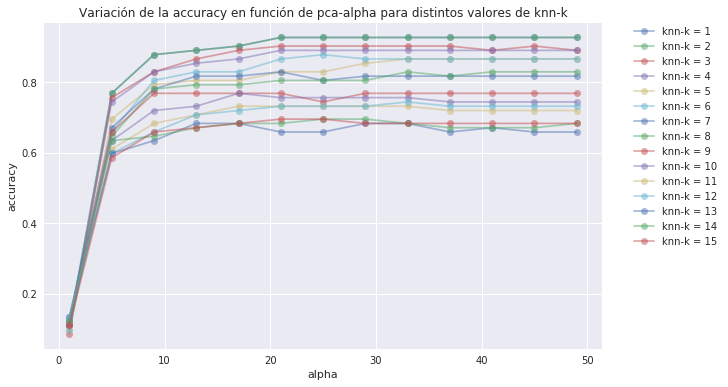

In [73]:
xs = [X[i] for i in range(0, 15, 1)]

plt.hold(True)
for k in xs:
    results = {}
    for a in alpha:
        results[(a,k)] = pd.read_csv('exp2/result_alpha{}_k{}'.format(a,k), header=None)[0]
    accuracy = list(map(lambda kresult: accuracy_score(expected, kresult), results.values()))
    plt.plot(alpha, accuracy, marker='o', label='knn-k = {}'.format(k), alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('Variación de la accuracy en función de pca-alpha para distintos valores de knn-k')

Text(0,0.5,'accuracy')

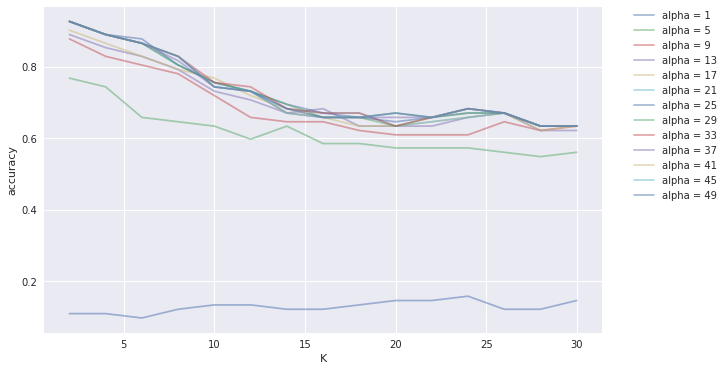

In [64]:
for a in alpha:
    results = {}
    for k in xs:
        results[(a,k)] = pd.read_csv('exp2/result_alpha{}_k{}'.format(a,k), header=None)[0]
    accuracy = list(map(lambda kresult: accuracy_score(expected, kresult), results.values()))
    plt.plot(xs, accuracy, label='alpha = {}'.format(a), alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('K')
plt.ylabel('accuracy')